<a href="https://colab.research.google.com/github/hamuya/chatbot/blob/main/tetorisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cargo 5 (size (3, 2)) could not be placed.
Final truck bed configuration:
[[1 1 2 6]
 [1 1 2 0]
 [0 0 2 0]
 [3 3 3 3]
 [4 4 4 0]
 [4 4 4 0]]


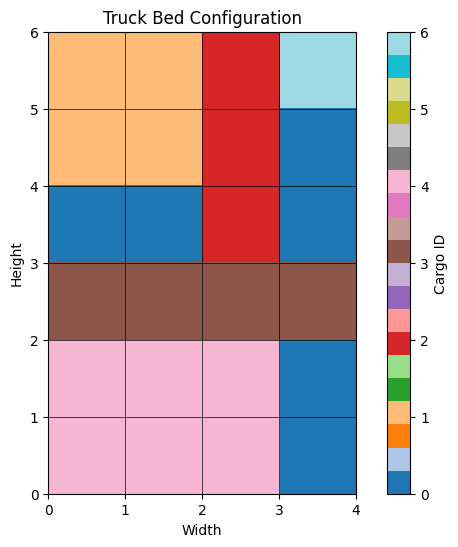

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
TRUCK_HEIGHT = 6  # 荷台の縦
TRUCK_WIDTH = 4   # 荷台の横

# 荷物のサイズリスト (縦, 横)
# 例: [(2, 2), (3, 1), (1, 4), ...]
CARGO_LIST = [
    (2, 2), (3, 1), (1, 4), (2, 3), (3, 2), (1, 1)
]

# トラック荷台の初期化
truck_bed = np.zeros((TRUCK_HEIGHT, TRUCK_WIDTH), dtype=int)

# 荷物を積む関数
def place_cargo(truck_bed, cargo, cargo_id):
    """
    荷物をトラック荷台に置く

    Args:
        truck_bed: 2D numpy array representing the truck bed
        cargo: Tuple of (height, width) for the cargo
        cargo_id: ID to mark the cargo in the truck bed

    Returns:
        bool: True if placed successfully, False otherwise
    """
    cargo_height, cargo_width = cargo

    for row in range(TRUCK_HEIGHT - cargo_height + 1):
        for col in range(TRUCK_WIDTH - cargo_width + 1):
            # 配置可能か確認
            if np.all(truck_bed[row:row + cargo_height, col:col + cargo_width] == 0):
                # 荷物を配置
                truck_bed[row:row + cargo_height, col:col + cargo_width] = cargo_id
                return True

    return False

# 荷物を順に積む
for cargo_id, cargo in enumerate(CARGO_LIST, start=1):
    if not place_cargo(truck_bed, cargo, cargo_id):
        print(f"Cargo {cargo_id} (size {cargo}) could not be placed.")

# 結果の表示
print("Final truck bed configuration:")
print(truck_bed)

# 視覚的に表示する関数
def visualize_truck_bed(truck_bed):
    plt.figure(figsize=(8, 6))
    plt.imshow(truck_bed, cmap="tab20", extent=[0, TRUCK_WIDTH, 0, TRUCK_HEIGHT])
    plt.colorbar(label="Cargo ID")
    plt.title("Truck Bed Configuration")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(which="both", color="black", linestyle="-", linewidth=0.5)
    plt.xticks(range(TRUCK_WIDTH + 1))
    plt.yticks(range(TRUCK_HEIGHT + 1))
    plt.show()

# 視覚的に表示
visualize_truck_bed(truck_bed)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
TRUCK_HEIGHT = 6  # 荷台の縦
TRUCK_WIDTH = 4   # 荷台の横

# 荷物のサイズリスト (縦, 横)
# ユーザーが入力できるように変更
print("Enter the dimensions of the cargos (height, width). Type 'done' when finished:")
CARGO_LIST = []
while True:
    user_input = input("Cargo (height,width): ")
    if user_input.lower() == 'done':
        break
    try:
        height, width = map(int, user_input.split(","))
        if height > 0 and width > 0:
            CARGO_LIST.append((height, width))
        else:
            print("Dimensions must be positive integers.")
    except ValueError:
        print("Invalid input. Please enter two integers separated by a comma.")

# トラック荷台の初期化
truck_bed = np.zeros((TRUCK_HEIGHT, TRUCK_WIDTH), dtype=int)

# 荷物を積む関数
def place_cargo(truck_bed, cargo, cargo_id):
    """
    荷物をトラック荷台に置く

    Args:
        truck_bed: 2D numpy array representing the truck bed
        cargo: Tuple of (height, width) for the cargo
        cargo_id: ID to mark the cargo in the truck bed

    Returns:
        bool: True if placed successfully, False otherwise
    """
    cargo_height, cargo_width = cargo

    for row in range(TRUCK_HEIGHT - cargo_height + 1):
        for col in range(TRUCK_WIDTH - cargo_width + 1):
            # 配置可能か確認
            if np.all(truck_bed[row:row + cargo_height, col:col + cargo_width] == 0):
                # 荷物を配置
                truck_bed[row:row + cargo_height, col:col + cargo_width] = cargo_id
                return True

    return False

# 荷物を順に積む
for cargo_id, cargo in enumerate(CARGO_LIST, start=1):
    if not place_cargo(truck_bed, cargo, cargo_id):
        print(f"Cargo {cargo_id} (size {cargo}) could not be placed.")

# 結果の表示
print("Final truck bed configuration:")
print(truck_bed)

# 視覚的に表示する関数
def visualize_truck_bed(truck_bed):
    plt.figure(figsize=(8, 6))
    plt.imshow(truck_bed, cmap="tab20", extent=[0, TRUCK_WIDTH, 0, TRUCK_HEIGHT])
    plt.colorbar(label="Cargo ID")
    plt.title("Truck Bed Configuration")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(which="both", color="black", linestyle="-", linewidth=0.5)
    plt.xticks(range(TRUCK_WIDTH + 1))
    plt.yticks(range(TRUCK_HEIGHT + 1))
    plt.show()

# 視覚的に表示
visualize_truck_bed(truck_bed)
